# **Class Imbalanced**

## **Introduction**

**What is Class Imbalanced ?**

* <mark style = 'background-color : powderblue'> **Class imbalance often appear in machine learing that refers to a scenario in classification problems where the distribution of classes is not uniform** </mark>
*  Imbalanced datasets are those where there is a severe skew in the class distribution, For example, in a dataset for fraud detection, there might be only 1% fraudulent transactions and 99% non-fraudulent transactions
* Imbalanced datasets apply to many types of models, including binary classification, multiclass classification, multilabel classification, and regression

**Why Imbalanced Class is Problem**

1. Bias Towards Majority Class: Algorithms tend to be biased towards the majority class due to its overwhelming presence in the training data.

2. Inaccurate Metrics: Metrics like accuracy can be misleading in imbalanced scenarios. For example, a model could be 99% accurate by predicting only the majority class, but this would ignore the minority class entirely.

3. Underrepresentation of Minority Class: The minority class, which may represent critical outcomes, is underrepresented, leading to poor model performance in predicting those classes.

**Imbalanced class handling technique**

There are several approaches to solving class imbalance problem before starting classification, such as:

1. More samples from the minority class(es) should be acquired from the knowledge domain.

2. Changing the loss function to give the failing minority class a higher cost.

3. Oversampling the minority class.

4. Undersampling the majority class.

5. Any combination of previous approaches.



## **Metrics for Imbalanced**

**Why we need consider evaluation metric while facing imbalanced dataset**

<mark style = 'background-color : powderblue'>**1. Accuracy Can Be Misleading** : </mark>
* In a dataset with 95% instances of the majority class and 5% of the minority class, a model that always predicts the majority class will achieve 95% accuracy, despite never identifying any minority class samples correctly. This gives a false sense of performance

<mark style = 'background-color : powderblue'>**2. Focus on Minority Class:**</mark>
* In many imbalanced scenarios, the minority class is more critical to predict accurately (e.g., fraud detection, disease diagnosis, defect detection in manufacturing). Evaluating the performance for this class requires specific metrics.

<mark style = 'background-color : powderblue'> **3. Different Types of Errors Matter:**</mark>
* Imbalanced datasets can lead to different types of errors, such as many false negatives for the minority class. Metrics like precision, recall, and F1-score help to identify how well the model is doing with respect to correctly identifying minority class instances.

**Common metrics used for imbalanced data**

<mark style = 'background-color : powderblue'>**The most common metrics to use for imbalanced datasets are**:</mark>

1. F1 score
2. Precision
3. Recall
4. AUC score (AUC ROC)
5. Average precision score (AP)
6. G-Mean

<mark style = 'background-color : powderblue'>**Choosing metric for imbalanced data**</mark>

<p align="center">
    <img src= "https://raw.githubusercontent.com/adisetiawannn/datascience_python/main/images/metric_imbalanced.png" alt="pict2" >
</p>

## **Dataset**

in this notebook, we will you fraud detection dataset. you can access the dataset through this link : [Credit Card Fraud Detection](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud?select=creditcard.csv)

* This is the Dictionary of Features of dataset :

    * Time : Number of seconds elapsed between this transaction and the first transaction in the dataset

    * V1 : may be result of a PCA Dimensionality reduction to protect user identities and sensitive features(v1-v28)

    * Class : 1 for fraudulent transactions, 0 otherwise



<Axes: xlabel='Class'>

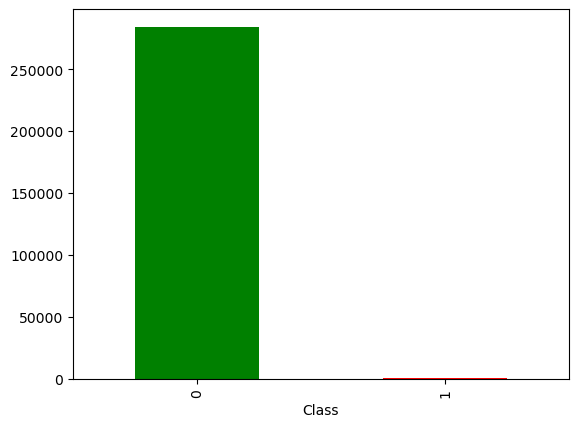

In [80]:
import pandas as pd

dataset = pd.read_csv('/Users/Shared/Cloud Drive/repo_adi/dataset/creditcard.csv')
dataset.head().style.background_gradient(cmap='Blues')

# check data proportion on Class Feature
dataset['Class'].value_counts().plot(kind='bar',color=['green','red'])

## **Model for Class Imbalanced Evaluation**

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

model = DecisionTreeClassifier()
X_train, X_test, y_train, y_test = train_test_split(dataset.drop(columns=['Class']), dataset['Class'], test_size=0.30, random_state=42)

# fit the model
model_fit = model.fit(X_train, y_train)

y_pred = model_fit.predict(X_test)


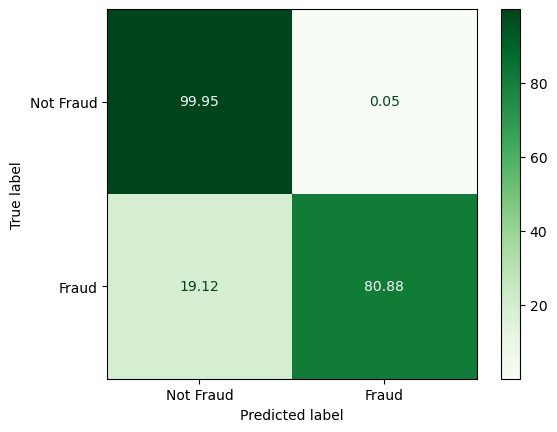

In [66]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import numpy as np

cm = confusion_matrix(y_true=y_test, y_pred=y_pred)

# Normalize confusion matrix to get percentages
cm_normalized = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis] * 100

disp_cm = ConfusionMatrixDisplay(cm_normalized, display_labels=np.where(model.classes_ == 0, 'Not Fraud', 'Fraud'))
disp_cm.plot(cmap='Greens', values_format='.2f')

# Reference :

1. Best Technique and Metrics for Imbalanced Dataset - Marcin Rutecki :  [Metrics for imbalanced data](https://www.kaggle.com/code/marcinrutecki/best-techniques-and-metrics-for-imbalanced-dataset#1.-Introduction)

2. Machine Learning Design Patterns - Book by Michael Munn, Sara Robinson, and Valliappa Lakshmana